In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt



In [41]:
price1999 = pd.read_csv(r'C:\Users\Loy\Documents\GitHub\BU5241_Private_Property_Analysis\Data\resale-flat-prices-based-on-approval-date-1990-1999.csv')
price2012 = pd.read_csv(r'C:\Users\Loy\Documents\GitHub\BU5241_Private_Property_Analysis\Data\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
price2014 = pd.read_csv(r'C:\Users\Loy\Documents\GitHub\BU5241_Private_Property_Analysis\Data\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price2016 = pd.read_csv(r'C:\Users\Loy\Documents\GitHub\BU5241_Private_Property_Analysis\Data\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
price2017 = pd.read_csv(r'C:\Users\Loy\Documents\GitHub\BU5241_Private_Property_Analysis\Data\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')


In [55]:
cpi = pd.read_csv(r'C:\Users\Loy\Documents\GitHub\BU5241_Private_Property_Analysis\Data\hdb2.csv')
cpi = cpi.iloc[:,:]
cpi= cpi.drop(columns=['All Items -> Housing & Utilities (Index)','All Items (Index)'])
cpi = cpi.rename({'All Items -> Housing & Utilities -> Accommodation (Index)': 'value'}, axis=1)  # new method
cpi = cpi.rename({'Data Series': 'year'}, axis=1)  # new method
cpi = cpi.dropna()
cpi = cpi.iloc[0:22]
cpi.value=pd.to_numeric(cpi.value)/100
cpi
#2019 is base year

,year,value
0,2022,1.062
1,2021,1.018
2,2020,1.004
3,2019,1.000
4,2018,1.010
5,2017,1.041
6,2016,1.085
7,2015,1.124
8,2014,1.154
9,2013,1.150


In [43]:
#Combine Prices
price1999.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [44]:
price2012

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0
...,...,...,...,...,...,...,...,...,...,...
369646,2012-02,YISHUN,5 ROOM,212,YISHUN ST 21,10 TO 12,121.0,Improved,1985,476888.0
369647,2012-02,YISHUN,5 ROOM,758,YISHUN ST 72,01 TO 03,122.0,Improved,1986,490000.0
369648,2012-02,YISHUN,5 ROOM,873,YISHUN ST 81,01 TO 03,122.0,Improved,1988,488000.0
369649,2012-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,705000.0


In [45]:
price2014

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0
...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0


In [46]:
price2016

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [47]:
price2017

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,66 years 03 months,440000.0
80370,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,65 years 06 months,458000.0
80371,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,66 years 04 months,490000.0
80372,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,66 years 03 months,558000.0


In [48]:
df = pd.concat([price1999,price2012,price2014,price2016,price2017])
df['month'] = pd.to_datetime(df['month']) # to datetime
df.head(10)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
5,1990-01-01,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN
6,1990-01-01,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,07 TO 09,67.0,NEW GENERATION,1977,42000.0,NaN
7,1990-01-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,10 TO 12,67.0,NEW GENERATION,1977,38000.0,NaN
8,1990-01-01,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,04 TO 06,67.0,NEW GENERATION,1977,40000.0,NaN
9,1990-01-01,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN


In [49]:
df['year'] = df['month'].dt.strftime('%Y') #Use pandas series dt to extract Year


In [50]:
df['year']=pd.to_numeric(df.year)
df['lease_commence_date']=pd.to_numeric(df.lease_commence_date)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09-01,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,66 years 03 months,2020
80370,2020-09-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,65 years 06 months,2020
80371,2020-09-01,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,66 years 04 months,2020
80372,2020-09-01,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,66 years 03 months,2020


In [51]:
# Replace all NaN in remaining lease to have a approximate remaning lease 
# By 99-(Year - lease_commence_date)
df['lease_expired'] =  df.year - df.lease_commence_date
df['remaining_lease'] = 99- df.lease_expired
df.remaining_lease 

0        86
1        86
2        86
3        86
4        85
         ..
80369    66
80370    66
80371    66
80372    66
80373    67
Name: remaining_lease, Length: 826581, dtype: int64

In [60]:
cpi.year = cpi.year.astype('int64')

In [61]:
df2=pd.merge(df,cpi,on=['year','year'])
df2.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lease_expired,value
0,2001-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1978,96000.0,76,2001,23,0.766
1,2001-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,04 TO 06,44.0,Improved,1978,100000.0,76,2001,23,0.766
2,2001-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,103000.0,76,2001,23,0.766
3,2001-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,04 TO 06,60.0,Improved,1986,120000.0,84,2001,15,0.766
4,2001-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,141000.0,84,2001,15,0.766
5,2001-01-01,ANG MO KIO,3 ROOM,172,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,126000.0,84,2001,15,0.766
6,2001-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,01 TO 03,61.0,Improved,1986,120000.0,84,2001,15,0.766
7,2001-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,60.0,Improved,1986,121000.0,84,2001,15,0.766
8,2001-01-01,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,10 TO 12,73.0,New Generation,1976,159500.0,74,2001,25,0.766
9,2001-01-01,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,01 TO 03,73.0,New Generation,1976,141000.0,74,2001,25,0.766


In [62]:
df2['cpi_adj_price']=df2.resale_price/df2.value

In [63]:
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lease_expired,value,cpi_adj_price
0,2001-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1978,96000.0,76,2001,23,0.766,125326.370757
1,2001-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,04 TO 06,44.0,Improved,1978,100000.0,76,2001,23,0.766,130548.302872
2,2001-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978,103000.0,76,2001,23,0.766,134464.751958
3,2001-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,04 TO 06,60.0,Improved,1986,120000.0,84,2001,15,0.766,156657.963446
4,2001-01-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,141000.0,84,2001,15,0.766,184073.107050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504514,2020-09-01,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,66,2020,33,1.004,438247.011952
504515,2020-09-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,66,2020,33,1.004,456175.298805
504516,2020-09-01,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,66,2020,33,1.004,488047.808765
504517,2020-09-01,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,66,2020,33,1.004,555776.892430


In [110]:
grouped = df2.groupby('year')
medians=grouped['cpi_adj_price'].median()
medians.index = pd.to_datetime(medians.index, format='%Y')
medians


year
2001-01-01    293733.681462
2002-01-01    282894.736842
2003-01-01    288948.069241
2004-01-01    299196.787149
2005-01-01    301204.819277
2006-01-01    303191.489362
2007-01-01    327225.130890
2008-01-01    349369.988545
2009-01-01    358695.652174
2010-01-01    394336.206897
2011-01-01    403940.886700
2012-01-01    402714.932127
2013-01-01    395652.173913
2014-01-01    363951.473137
2015-01-01    360320.284698
2016-01-01    377880.184332
2017-01-01    393852.065322
2018-01-01    403960.396040
2019-01-01    400000.000000
2020-01-01    413346.613546
Name: cpi_adj_price, dtype: float64

C:\Users\Loy\AppData\Local\Temp\ipykernel_17860\817028434.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


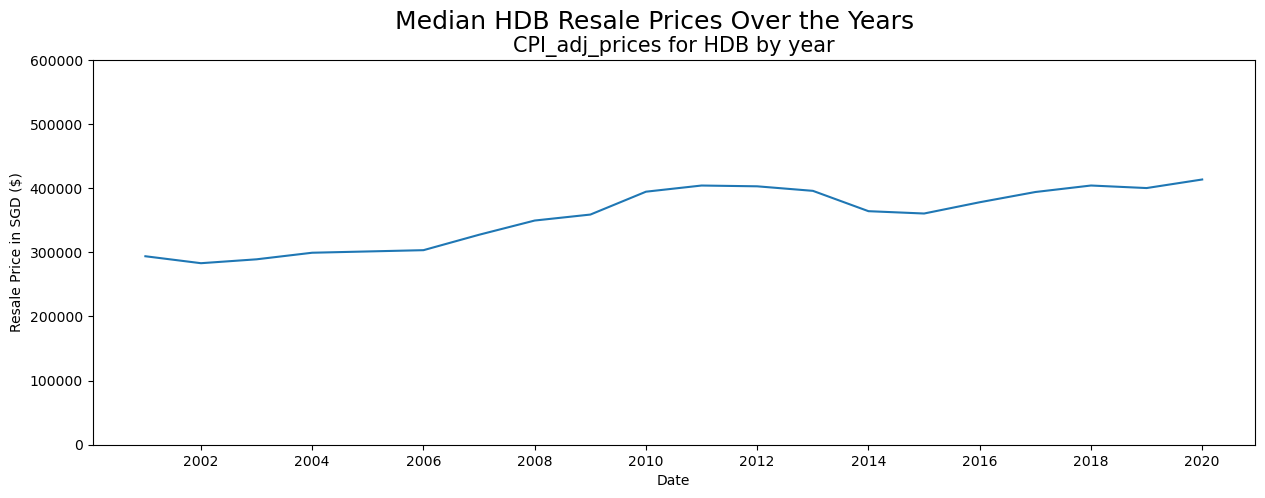

In [65]:
fig,ax= plt.subplots(figsize=(15,5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax.plot(medians.index,medians.values)
ax.set_xlabel('Date')
ax.set_ylabel('Resale Price in SGD ($)')
ax.set_ylim(0, 600000)
ax.set_title('CPI_adj_prices for HDB by year', size=15)
fig.show()


Text(0.5, 1.0, 'CPI_adj_prices for HDB by month')

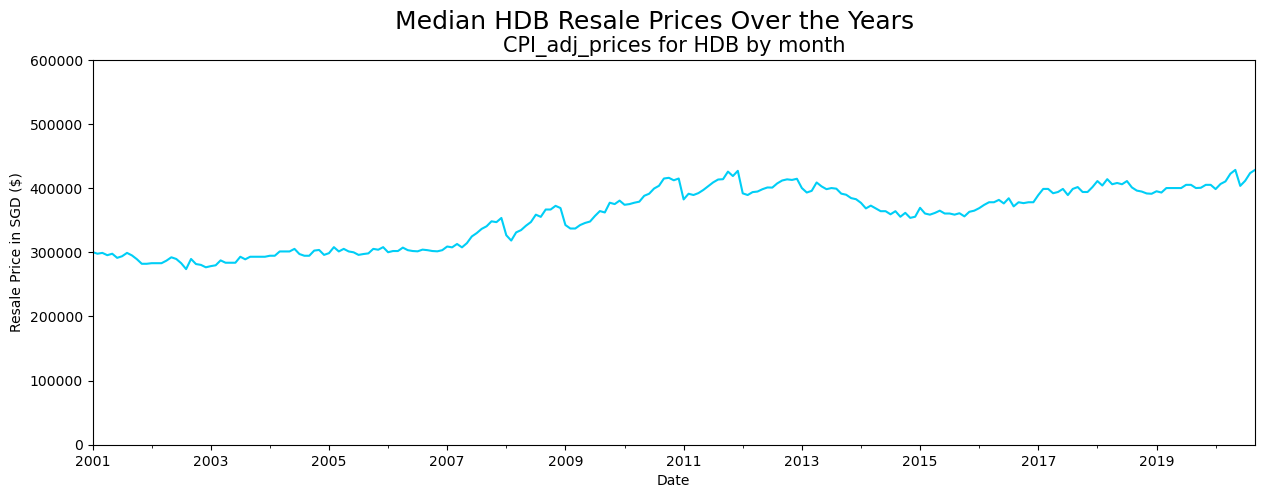

In [66]:
# Adj Cpi By month
fig,ax = plt.subplots(figsize=(15,5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
df2.groupby('month')[['cpi_adj_price']].median().plot(ax=ax, color='#00cef6', legend=None)
ax.set_xlabel('Date')
ax.set_ylabel('Resale Price in SGD ($)')
ax.set_ylim(0, 600000)
ax.set_title('CPI_adj_prices for HDB by month', size=15)

In [128]:
medians_df=medians.reset_index()
medians_df.year=pd.to_datetime(medians_df.year,format='%Y')
medians_df['year'] = medians_df['year'].dt.year
#Set Year as Index
medians_df= medians_df.set_index('year')

# Calculate year-on-year increase
medians_df['YoY Increase'] = medians_df['cpi_adj_price'].pct_change(periods=1) * 100
medians_df["Color"] = np.where(medians_df["YoY Increase"]<0, 'red', 'green')
# Print dataframe with year-on-year increase
print(medians_df)


      cpi_adj_price  YoY Increase  Color
year                                    
2001  293733.681462           NaN  green
2002  282894.736842     -3.690058    red
2003  288948.069241      2.139783  green
2004  299196.787149      3.546907  green
2005  301204.819277      0.671141  green
2006  303191.489362      0.659574  green
2007  327225.130890      7.926885  green
2008  349369.988545      6.767468  green
2009  358695.652174      2.669280  green
2010  394336.206897      9.936155  green
2011  403940.886700      2.435658  green
2012  402714.932127     -0.303499    red
2013  395652.173913     -1.753786    red
2014  363951.473137     -8.012265    red
2015  360320.284698     -0.997712    red
2016  377880.184332      4.873414  green
2017  393852.065322      4.226705  green
2018  403960.396040      2.566530  green
2019  400000.000000     -0.980392    red
2020  413346.613546      3.336653  green


<AxesSubplot:xlabel='year'>

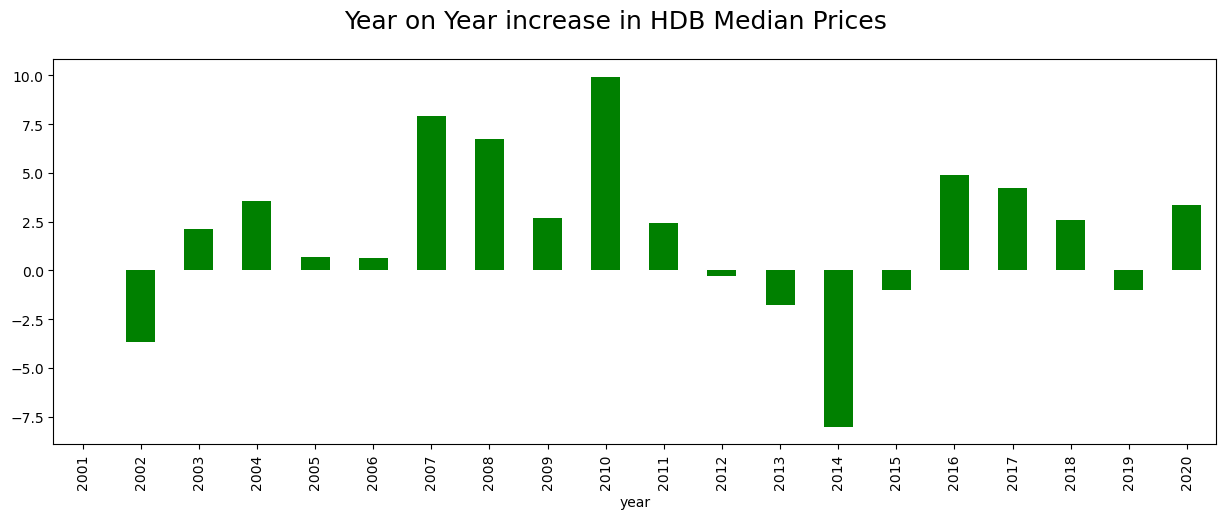

In [138]:
# YoY increase in Median price
fig,ax = plt.subplots(figsize=(15,5))
fig.suptitle('Year on Year increase in HDB Median Prices', fontsize=18)
yoyplot= medians_df.drop(columns=['cpi_adj_price'])
yoyplot.plot(ax=ax, color=yoyplot['Color'], legend=None,kind='bar')

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (1).

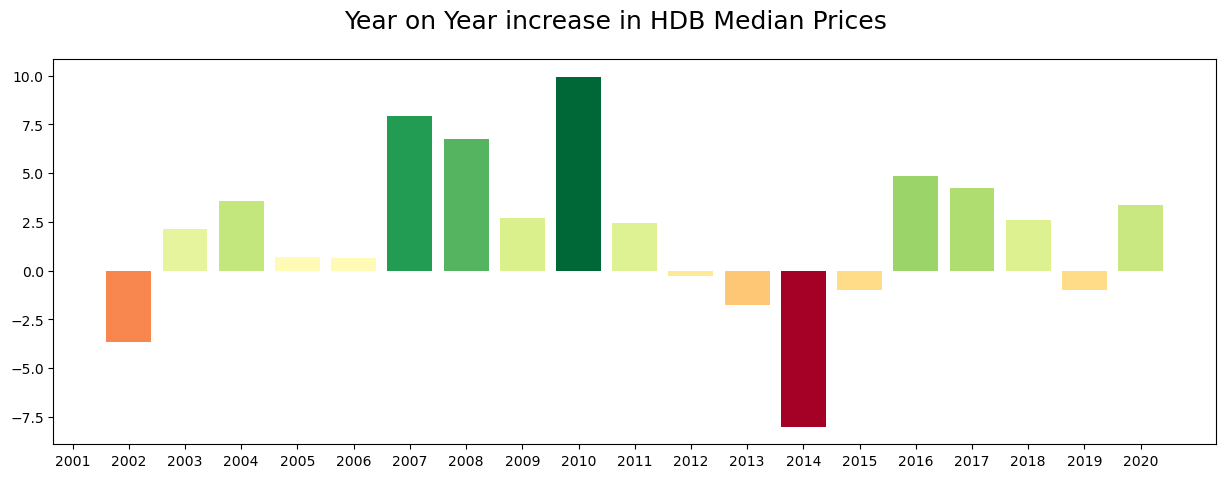

In [160]:
yoyplot= medians_df.drop(columns=['cpi_adj_price'])
from matplotlib.cm import ScalarMappable
# create custom color map with red for negative and green for positive values
cmap = ScalarMappable(norm=plt.Normalize(vmin=yoyplot['YoY Increase'].min(), vmax=yoyplot['YoY Increase'].max()), cmap='RdYlGn')
# create an array of colors based on the values in the 'y' column
colors = [cmap.to_rgba(val) for val in yoyplot['YoY Increase']]
fig,ax = plt.subplots(figsize=(15,5))
fig.suptitle('Year on Year increase in HDB Median Prices', fontsize=18)
plt.bar(yoyplot.index, yoyplot['YoY Increase'], color=colors)
labels = [yoyplot.index]
plt.xticks(yoyplot.index, labels, rotation ='vertical')





In [81]:
# Create example dataframe
hdb_df = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Median Price': [300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000]
})

# Set 'Year' as the index
hdb_df = hdb_df.set_index('Year')

# Calculate year-on-year increase
hdb_df['YoY Increase'] = hdb_df['Median Price'].pct_change(periods=1) * 100

# Print dataframe with year-on-year increase
print(hdb_df)

      Median Price  YoY Increase
Year                            
2010        300000           NaN
2011        320000      6.666667
2012        340000      6.250000
2013        360000      5.882353
2014        380000      5.555556
2015        400000      5.263158
2016        420000      5.000000
2017        440000      4.761905


In [ ]:
df2.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'lease_expired', 'value', 'cpi_adj_price'],
      dtype='object')

In [ ]:
df2.flat_type.value_counts()
#two kinds of multi-generation


4 ROOM              309314
3 ROOM              272580
5 ROOM              170408
EXECUTIVE            62641
2 ROOM                9863
1 ROOM                1273
MULTI GENERATION       279
MULTI-GENERATION       223
Name: flat_type, dtype: int64

In [ ]:
df2['flat_type']=df2['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
#combine both multi generation


In [ ]:
#Rename flat model duplicates : Thanks to TEYANG LAU for this code
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}
df2 = df2.replace({'flat_model': replace_values})

#Simplify into broader categories :  Thanks to TEYANG LAU for this code
replace_values = {'Executive Maisonette':'Maisonette', 'Terrace':'Special', 'Adjoined flat':'Special', 
                    'Type S1S2':'Special', 'DBSS':'Special', 'Model A2':'Model A', 'Premium Apartment':'Apartment', 'Improved':'Standard', 'Simplified':'Model A', '2-room':'Standard'}
df2 = df2.replace({'flat_model': replace_values})

df2['flat_model'].value_counts()

Model A             291458
Standard            257250
New Generation      177570
Apartment            67070
Maisonette           28994
Special               3737
Multi Generation       502
Name: flat_model, dtype: int64

In [ ]:
df2.storey_range.value_counts()

04 TO 06    209705
07 TO 09    189109
01 TO 03    168985
10 TO 12    160250
13 TO 15     52212
16 TO 18     19449
19 TO 21      9422
22 TO 24      6053
01 TO 05      2700
25 TO 27      2544
06 TO 10      2474
11 TO 15      1259
28 TO 30      1049
34 TO 36       267
31 TO 33       265
16 TO 20       265
37 TO 39       255
40 TO 42       132
21 TO 25        92
26 TO 30        39
46 TO 48        21
43 TO 45        16
49 TO 51         9
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [ ]:
#Might not be a good replacement
#replace_values = {'01 TO 03':'01-15', '04 TO 06':'01-15', '01 TO 05':'01-15', '07 TO 09':'01-15', '06 TO 10':'01-15', '10 TO 12':'01-15', '13 TO 15':'01-15', '16 TO 18':'16-30', '19 TO 21':'16-30', '22 TO 24':'16-30', '24 TO 27':'16-30', '28 TO 30':'16-30', '16 TO 20':'16-30', '21 TO 25':'16-30', '26 TO 30':'16-30', '31 TO 33':'31-51', '34 TO 36':'31-51', '37 TO 39':'31-51', '40 TO 42':'31-51', '46 TO 48':'31-51', '43 TO 45':'31-51', '49-51':'31-51', '36 TO 40':'31-51', '31 TO 35':'31-51','25 TO 27':'16-30','11 TO 15':'01-15', '49 TO 51':'31-51' }

#df2 = df2.replace({'storey_range': replace_values})


In [ ]:
df2.storey_range.value_counts()

04 TO 06    209705
07 TO 09    189109
01 TO 03    168985
10 TO 12    160250
13 TO 15     52212
16 TO 18     19449
19 TO 21      9422
22 TO 24      6053
01 TO 05      2700
25 TO 27      2544
06 TO 10      2474
11 TO 15      1259
28 TO 30      1049
34 TO 36       267
31 TO 33       265
16 TO 20       265
37 TO 39       255
40 TO 42       132
21 TO 25        92
26 TO 30        39
46 TO 48        21
43 TO 45        16
49 TO 51         9
36 TO 40         7
31 TO 35         2
Name: storey_range, dtype: int64

In [ ]:
#2014-2019 cpi_adj_price by flat model
type_2014= df2.loc[df2['year']>2013,['year','flat_type','cpi_adj_price']]

In [ ]:
grouped_flat_type_2014= type_2014.groupby(['flat_type','year'])['cpi_adj_price'].mean()
print(grouped_flat_type_2014)

flat_type         year
1 ROOM            2014    234892.766920
                  2015    218889.216112
                  2016    221613.000740
                  2017    206406.124599
                  2018    186034.710013
                  2019    175842.545455
                  2020    175897.641344
2 ROOM            2014    279238.811069
                  2015    260870.265576
                  2016    256329.515453
                  2017    246955.335290
                  2018    238226.662289
                  2019    228534.125604
                  2020    230900.459575
3 ROOM            2014    360446.436275
                  2015    341580.839046
                  2016    336144.656387
                  2017    326563.272428
                  2018    309680.071822
                  2019    299457.241933
                  2020    306950.323772
4 ROOM            2014    470283.408842
                  2015    456085.002374
                  2016    452897.993427
                 

(0.0, 1000000.0)

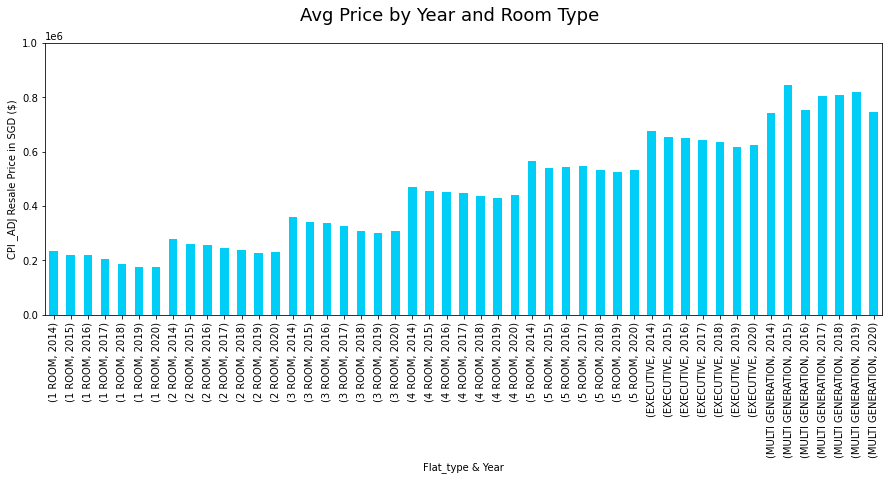

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
fig.suptitle('Avg Price by Year and Room Type', fontsize=18)
grouped_flat_type_2014.plot(ax=ax, color='#00cef6', legend=None,kind='bar')
ax.set_xlabel('Flat_type & Year')
ax.set_ylabel('CPI _ADJ Resale Price in SGD ($)')
ax.set_ylim(0, 1000000)


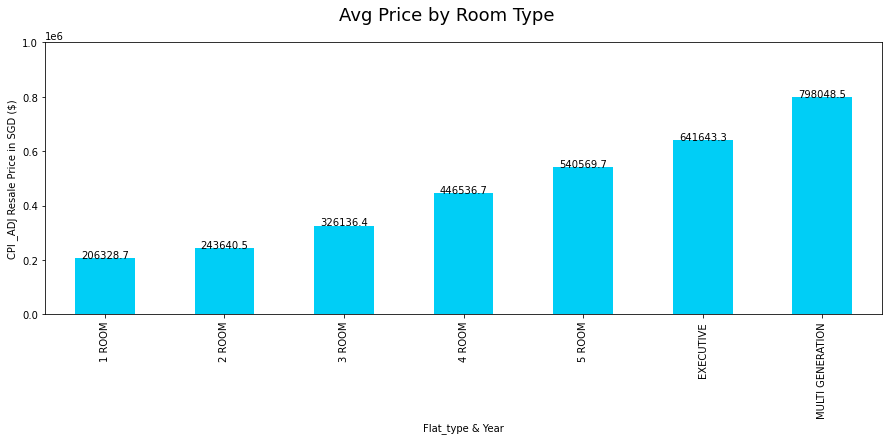

In [ ]:
grouped_flat_type_2014= type_2014.groupby(['flat_type'])['cpi_adj_price'].mean()
fig,ax = plt.subplots(figsize=(15,5))
fig.suptitle('Avg Price by Room Type ', fontsize=18)
grouped_flat_type_2014.plot(ax=ax, color='#00cef6', legend=None,kind='bar')
ax.set_xlabel('Flat_type & Year')
ax.set_ylabel('CPI _ADJ Resale Price in SGD ($)')
ax.set_ylim(0, 1000000)
for i, v in enumerate(grouped_flat_type_2014):
    ax.text(i, v, str(round(v, 1)), ha='center')

In [ ]:
df2.town.value_counts()

TAMPINES           73101
YISHUN             63309
BEDOK              61400
JURONG WEST        60708
WOODLANDS          58735
ANG MO KIO         48237
HOUGANG            45476
BUKIT BATOK        40444
CHOA CHU KANG      33388
BUKIT MERAH        30518
PASIR RIS          30267
TOA PAYOH          28525
QUEENSTOWN         25922
CLEMENTI           25755
GEYLANG            25679
BUKIT PANJANG      24241
KALLANG/WHAMPOA    24030
SENGKANG           23903
JURONG EAST        22864
SERANGOON          21125
BISHAN             19522
PUNGGOL            12336
SEMBAWANG          11016
MARINE PARADE       7388
CENTRAL AREA        6345
BUKIT TIMAH         2283
LIM CHU KANG          64
Name: town, dtype: int64

In [ ]:
town_2014= df2.loc[df2['year']>2013,['year','town','cpi_adj_price']]
grouped_town_2014= town_2014.groupby(['town'])['cpi_adj_price'].mean().sort_values(ascending=False)
top_5= grouped_town_2014.head(5)

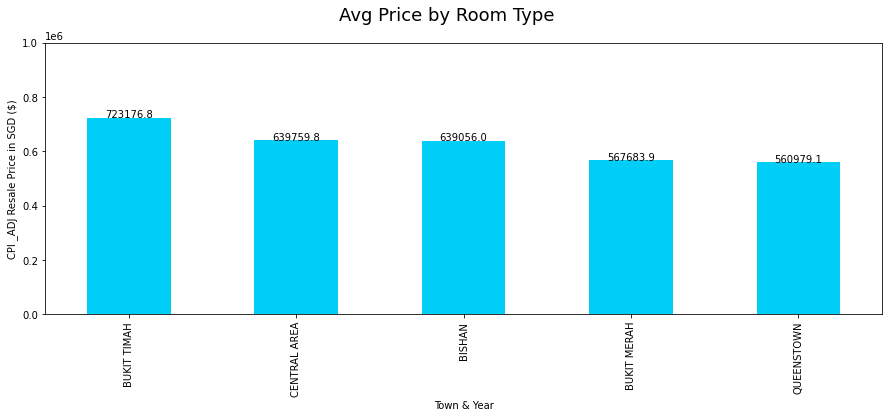

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
fig.suptitle('Avg Price by Room Type ', fontsize=18)
top_5.plot(ax=ax, color='#00cef6', legend=None,kind='bar')
ax.set_xlabel('Town & Year')
ax.set_ylabel('CPI _ADJ Resale Price in SGD ($)')
ax.set_ylim(0, 1000000)
for i, v in enumerate(top_5):
    ax.text(i, v, str(round(v, 1)), ha='center')

In [ ]:
import folium
m = folium.Map(location=[1.357, 103.81], zoom_start=12.4)

m

In [ ]:
town=df2.town.unique()
town

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [ ]:
#GPS Directly taken from GPS_Cordinates.net
lat_long=[1.3700803,103.8495228,1.3239765,103.930216,1.3509859,103.8482551,1.3490572,103.7495906,1.2837356,103.8200999,1.3546901,103.7763724,1.28967,103.85007,1.3849343061447144,103.74625396728516,1.3065141439437866,103.76336669921875,1.3181862,103.8870563,1.3708011,103.8925443,1.333108,103.7422939,1.3434392,103.7058663,1.310759,103.866262,1.3026889,103.9073952,1.3026505708694458,103.7967529296875,1.3933453559875488,103.89371490478516,1.3497611,103.8736841,1.3546528,103.9435712,1.3353906,103.8497414,1.436897,103.786216,1.4293839,103.8350282,1.4342172,103.7149872,1.4490928,103.8200555,1.3779175,103.7630947,1.3730307,103.949255,
1.4051559,103.902368]
lat = [i for i in lat_long[::2]]
long=[i for i in lat_long[1::2]]

Trying A rough Model first 

Label Encoding all Categorical Data

In [ ]:
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lease_expired,value,cpi_adj_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Standard,1977,9000.0,86,1990,13,0.62094,14494.154025
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Standard,1977,6000.0,86,1990,13,0.62094,9662.769350
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Standard,1977,8000.0,86,1990,13,0.62094,12883.692466
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Standard,1977,6000.0,86,1990,13,0.62094,9662.769350
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,1990,14,0.62094,76013.785551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2020-09-01,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Standard,1987,440000.0,66,2020,33,0.99845,440683.058741
826577,2020-09-01,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Standard,1987,458000.0,66,2020,33,0.99845,458711.002053
826578,2020-09-01,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Standard,1987,490000.0,66,2020,33,0.99845,490760.679053
826579,2020-09-01,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,66,2020,33,0.99845,558866.242676


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()



In [ ]:
df2['town'] = encoder.fit_transform(df2['town'])
meta_town = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
meta_town

{'ANG MO KIO': 0,
 'BEDOK': 1,
 'BISHAN': 2,
 'BUKIT BATOK': 3,
 'BUKIT MERAH': 4,
 'BUKIT PANJANG': 5,
 'BUKIT TIMAH': 6,
 'CENTRAL AREA': 7,
 'CHOA CHU KANG': 8,
 'CLEMENTI': 9,
 'GEYLANG': 10,
 'HOUGANG': 11,
 'JURONG EAST': 12,
 'JURONG WEST': 13,
 'KALLANG/WHAMPOA': 14,
 'LIM CHU KANG': 15,
 'MARINE PARADE': 16,
 'PASIR RIS': 17,
 'PUNGGOL': 18,
 'QUEENSTOWN': 19,
 'SEMBAWANG': 20,
 'SENGKANG': 21,
 'SERANGOON': 22,
 'TAMPINES': 23,
 'TOA PAYOH': 24,
 'WOODLANDS': 25,
 'YISHUN': 26}

In [ ]:
df2['flat_type'] = encoder.fit_transform(df2['flat_type'])
meta_flat_type = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
meta_flat_type

{'1 ROOM': 0,
 '2 ROOM': 1,
 '3 ROOM': 2,
 '4 ROOM': 3,
 '5 ROOM': 4,
 'EXECUTIVE': 5,
 'MULTI GENERATION': 6}

In [ ]:
df2['flat_model'] = encoder.fit_transform(df2['flat_model'])
meta_flat_model = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
meta_flat_model

{'Apartment': 0,
 'Maisonette': 1,
 'Model A': 2,
 'Multi Generation': 3,
 'New Generation': 4,
 'Special': 5,
 'Standard': 6}

In [ ]:
df2['storey_range'] = encoder.fit_transform(df2['storey_range'])
meta_storey_range = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
meta_storey_range

{'01 TO 03': 0,
 '01 TO 05': 1,
 '04 TO 06': 2,
 '06 TO 10': 3,
 '07 TO 09': 4,
 '10 TO 12': 5,
 '11 TO 15': 6,
 '13 TO 15': 7,
 '16 TO 18': 8,
 '16 TO 20': 9,
 '19 TO 21': 10,
 '21 TO 25': 11,
 '22 TO 24': 12,
 '25 TO 27': 13,
 '26 TO 30': 14,
 '28 TO 30': 15,
 '31 TO 33': 16,
 '31 TO 35': 17,
 '34 TO 36': 18,
 '36 TO 40': 19,
 '37 TO 39': 20,
 '40 TO 42': 21,
 '43 TO 45': 22,
 '46 TO 48': 23,
 '49 TO 51': 24}

In [ ]:
df2

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lease_expired,value,cpi_adj_price
0,1990-01-01,0,0,309,ANG MO KIO AVE 1,5,31.0,6,1977,9000.0,86,1990,13,0.62094,14494.154025
1,1990-01-01,0,0,309,ANG MO KIO AVE 1,2,31.0,6,1977,6000.0,86,1990,13,0.62094,9662.769350
2,1990-01-01,0,0,309,ANG MO KIO AVE 1,5,31.0,6,1977,8000.0,86,1990,13,0.62094,12883.692466
3,1990-01-01,0,0,309,ANG MO KIO AVE 1,4,31.0,6,1977,6000.0,86,1990,13,0.62094,9662.769350
4,1990-01-01,0,2,216,ANG MO KIO AVE 1,2,73.0,4,1976,47200.0,85,1990,14,0.62094,76013.785551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2020-09-01,26,4,716,YISHUN ST 71,4,131.0,6,1987,440000.0,66,2020,33,0.99845,440683.058741
826577,2020-09-01,26,4,760,YISHUN ST 72,4,122.0,6,1987,458000.0,66,2020,33,0.99845,458711.002053
826578,2020-09-01,26,4,835,YISHUN ST 81,2,122.0,6,1987,490000.0,66,2020,33,0.99845,490760.679053
826579,2020-09-01,26,5,791,YISHUN AVE 2,2,146.0,1,1987,558000.0,66,2020,33,0.99845,558866.242676


### Use only data from 2013 onwards


In [ ]:
df_2014 = df2[df2.year>=2013]
df_2014

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lease_expired,value,cpi_adj_price
676861,2013-01-01,0,1,510,ANG MO KIO AVE 8,0,44.0,6,1980,253000.0,66,2013,33,0.92799,272632.248192
676862,2013-01-01,0,1,314,ANG MO KIO AVE 3,0,44.0,6,1978,270000.0,64,2013,35,0.92799,290951.411114
676863,2013-01-01,0,1,323,ANG MO KIO AVE 3,2,44.0,6,1977,283000.0,63,2013,36,0.92799,304960.182761
676864,2013-01-01,0,2,170,ANG MO KIO AVE 4,4,61.0,6,1986,305000.0,72,2013,27,0.92799,328667.334777
676865,2013-01-01,0,2,174,ANG MO KIO AVE 4,0,60.0,6,1986,320000.0,72,2013,27,0.92799,344831.302061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2020-09-01,26,4,716,YISHUN ST 71,4,131.0,6,1987,440000.0,66,2020,33,0.99845,440683.058741
826577,2020-09-01,26,4,760,YISHUN ST 72,4,122.0,6,1987,458000.0,66,2020,33,0.99845,458711.002053
826578,2020-09-01,26,4,835,YISHUN ST 81,2,122.0,6,1987,490000.0,66,2020,33,0.99845,490760.679053
826579,2020-09-01,26,5,791,YISHUN AVE 2,2,146.0,1,1987,558000.0,66,2020,33,0.99845,558866.242676


In [ ]:
X=df_2014[['town','flat_type','storey_range','flat_model','remaining_lease','floor_area_sqm','year']]
Y=df_2014[['cpi_adj_price']]

In [ ]:
from scipy import stats #Normalizing
X['floor_area_sqm'] = stats.zscore(X['floor_area_sqm'])
X['year'] = stats.zscore(X['year'])



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

## Regression, Decision Tree, Random Forest , GBoost, Neural Net

In [ ]:
#Linear Reg
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("rmse is ",mean_squared_error(Y_test,pred)**0.5)

rmse is  96499.79668943636


In [ ]:
# Decision Tree
from sklearn import tree
model = tree.DecisionTreeRegressor(random_state=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("rmse is ",mean_squared_error(Y_test,pred)**0.5)

rmse is  42371.18038941987


In [ ]:
#Random
from sklearn import ensemble
model = ensemble.RandomForestRegressor(random_state=1)
model.fit(X_train,Y_train.values.ravel())
pred=model.predict(X_test)
print("rmse is ",mean_squared_error(Y_test,pred)**0.5)


rmse is  35048.86129476734


In [ ]:
#Gboost
model=ensemble.GradientBoostingRegressor(random_state=1)
model.fit(X_train,Y_train.values.ravel())
pred=model.predict(X_test)
print("rmse is ",mean_squared_error(Y_test,pred)**0.5)

rmse is  62479.3442888315


In [ ]:
#Neural Network
from sklearn import neural_network
model = neural_network.MLPRegressor(random_state=1)
model.fit(X_train,Y_train.values.ravel())
pred=model.predict(X_test)
print("rmse is ",mean_squared_error(Y_test,pred)**0.5)

rmse is  98342.26439654776


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## Random Forest Best , Proceed with it

In [ ]:
def create_sample(town,flat_type,storey_range,flat_model,remaining_lease,floor_area_sqm,year):
    new_df= df_2014['floor_area_sqm'].append(pd.Series([floor_area_sqm]), ignore_index=True)
    normalized_df=stats.zscore(new_df)
    normalized_fas=normalized_df.iloc[-1]
    new_df= df_2014['year'].append(pd.Series([year]), ignore_index=True)
    normalized_df=stats.zscore(new_df)
    normalized_year=normalized_df.iloc[-1]
    sample=[[town,flat_type,storey_range,flat_model,remaining_lease,normalized_fas,normalized_year]]
    return sample


In [ ]:
dict1 = meta_town
dict2 = meta_flat_type
dict3 = meta_storey_range
dict4= meta_flat_model

# get the maximum length of the keys across all dictionaries
max_len = max([len(dict1),len(dict2),len(dict4),len(dict4)])


# print the dictionaries side by side
for i in range(max_len):
    key1 = list(dict1.items())[i] if i < len(dict1) else ('', '')
    key2 = list(dict2.items())[i] if i < len(dict2) else ('', '')
    key3 = list(dict3.items())[i] if i < len(dict3) else ('', '')
    key4 = list(dict4.items())[i] if i < len(dict4) else ('', '')
    print(f"{key1[0]:<{max_len}}: {key1[1]:<10} {key2[0]:<{max_len}}: {key2[1]:<10} {key3[0]:<{max_len}}: {key3[1]:<10} {key4[0]:<{max_len}}: {key4[1]:<10}")


ANG MO KIO                 : 0          1 ROOM                     : 0          01 TO 03                   : 0          Apartment                  : 0         
BEDOK                      : 1          2 ROOM                     : 1          01 TO 05                   : 1          Maisonette                 : 1         
BISHAN                     : 2          3 ROOM                     : 2          04 TO 06                   : 2          Model A                    : 2         
BUKIT BATOK                : 3          4 ROOM                     : 3          06 TO 10                   : 3          Multi Generation           : 3         
BUKIT MERAH                : 4          5 ROOM                     : 4          07 TO 09                   : 4          New Generation             : 4         
BUKIT PANJANG              : 5          EXECUTIVE                  : 5          10 TO 12                   : 5          Special                    : 5         
BUKIT TIMAH                : 6          

## create_sample(TOWN,FLAT_TYPE,STOREY_RANGE,FLAT_MODEL,remaining_lease,floor_area_sqm,year)
### capitalized X is categorical, refer to above list
### uncapitalized X is continuous, just type in 
HDB flat_type : https://www.teoalida.com/singapore/hdbflattypes/#:~:text=3%2DRoom%20Model%20A%20


In [ ]:
sample=create_sample(13,4,2,5,92,108,2022)
pred=model.predict(sample)
print(pred)

[517900.73034075]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Linear Reg
# Print the intercept and coefficients of the model
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Print the R-squared value
print('R-squared:', model.score(X, Y))

AttributeError: 'MLPRegressor' object has no attribute 'intercept_'

In [ ]:
#DT,RF,GB,NN
# Print the feature importances
print('Feature Importances:', model.feature_importances_)

# Print the R-squared value
print('R-squared:', model.score(X, Y))

Feature Importances: [0.22133219 0.02579521 0.10230747 0.02987103 0.1005577  0.47082898
 0.04930742]
R-squared: 0.9734079283139425


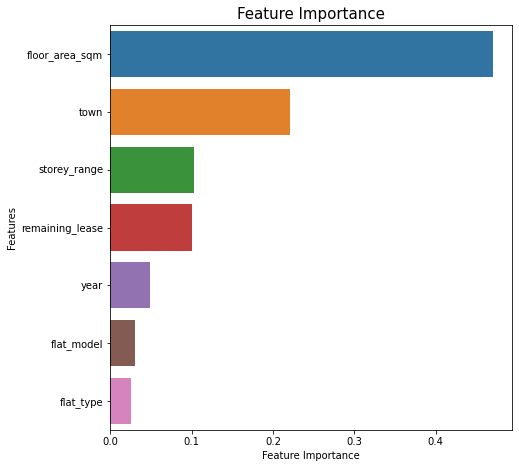

In [ ]:

fig = plt.figure(figsize=(14,7))

ax1 = plt.subplot(121)
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': model.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp)
#plt.xticks(rotation=45, ha='right')
ax1.set_title('Feature Importance', size=15)

plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
fig.show()